In [1]:
import pandas as pd
import numpy as np
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from visualize_placement import visualize_placement
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator

## Load necessary data

In [2]:
G = pickle.load(open('data/revised_cleaning_results/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/revised_cleaning_results/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

## Generate random df

In [3]:
import time
df_chance = df_ivs.copy()
%time df_random1 = random_vessel_generator(df_chance, 1)

CPU times: total: 109 ms
Wall time: 115 ms


In [4]:
df_random1

,origin,destination,trip_count,M12,M8,M9,BIIa-1,BII-6b,M10,BII-6l,...,C2l,M0,B04,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,292,0,0,0,0,0,0,0,...,0,0,6,0,8,0,0,0,0,0
1,NLRTM,NLAMS,6079,0,3482,1296,108,0,0,0,...,10,0,0,0,0,0,0,0,0,1
2,NLRTM,NLAMS,3581,2078,0,0,0,0,433,0,...,0,0,0,39,0,0,0,0,0,2
3,NLRTM,NLMOE,2122,0,1549,132,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NLRTM,NLMOE,536,86,0,0,0,0,57,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NLAMS,NLZWI,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,NLAMS,NLZWI,77,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
146,NLAMS,NLZWI,124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
147,NLAMS,NLZWI,50,0,39,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


## Compute path flows

In [5]:
%time flows = flow_computation(df_random1)
sum(flows.values())

CPU times: total: 500 ms
Wall time: 495 ms


1260.8376516634041

## Run first stage FRLM

In [6]:
# range r in meters
df_b, df_g, df_eq_fq = first_stage_frlm(1000000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h)

## Run second stage FRLM

In [7]:
optimal_facilities, optimal_flows, non_zero_flows, supported_flow = second_stage_frlm(1000, 10, 5, df_g, df_b, df_eq_fq)

Optimal


In [8]:
sum(optimal_facilities.values())

340.0

In [9]:
sum(optimal_flows.values())

144.0

In [10]:
supported_flow

1260.8376516634041

## Visualize placement

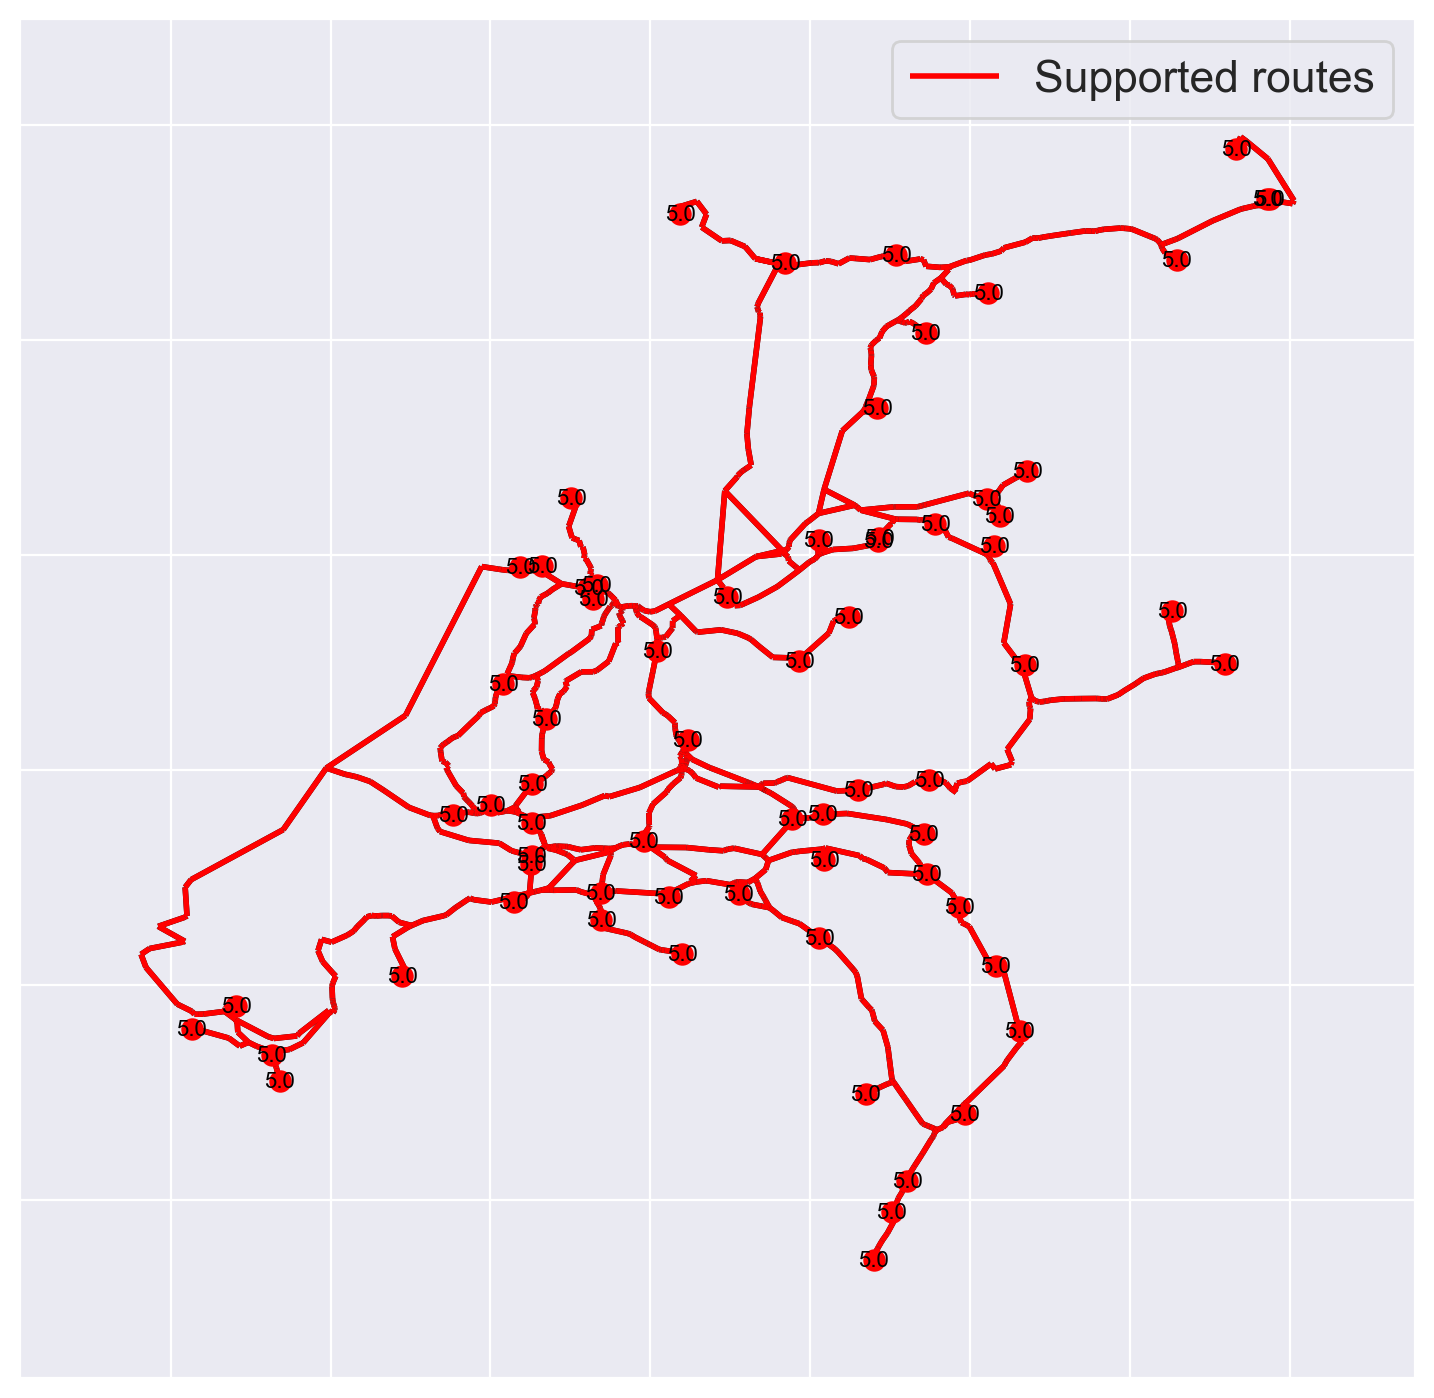

In [11]:
visualize_placement(G, flows, optimal_facilities, non_zero_flows, df_h, paths, unused=False)

## Try out complete function

In [2]:
from fullfrlm import flow_refueling_location_model

In [3]:
total_flow, supported_fraction, optimal_facilities, non_zero_flows = flow_refueling_location_model(1, 50000, 100, 5, 5)

Optimal


In [4]:
supported_fraction

0.15013169158585246

In [5]:
total_flow, supported_fraction, optimal_facilities, non_zero_flows = flow_refueling_location_model(1, 50000, 100, 5, 5, 30)

Optimal


In [6]:
supported_fraction

0.16621278614231766